<h1>Team Standings Table after prediction results

In [1]:
import pandas as pd
import constants as c
test_with_predictions = pd.read_csv(c.GB_pred, encoding='latin')

# Create a dictionary to store team statistics
team_stats = {}

# Aggregate predictions for each team
for index, row in test_with_predictions.iterrows():
    home_team = row['Home_Team']
    away_team = row['Away_Team']
    home_score = row['Predicted_Home_Score']
    away_score = row['Predicted_Away_Score']
    
    # Update statistics for home team
    if home_team not in team_stats:
        team_stats[home_team] = {'matches_played': 0, 'won': 0, 'draw': 0, 'lost': 0, 'goals_scored': 0, 'goals_conceded': 0, 'goal_difference': 0, 'points': 0}
    team_stats[home_team]['matches_played'] += 1
    team_stats[home_team]['goals_scored'] += home_score
    team_stats[home_team]['goals_conceded'] += away_score
    team_stats[home_team]['goal_difference'] += home_score - away_score
    if home_score > away_score:
        team_stats[home_team]['won'] += 1
        team_stats[home_team]['points'] += 3
    elif home_score == away_score:
        team_stats[home_team]['draw'] += 1
        team_stats[home_team]['points'] += 1
    else:
        team_stats[home_team]['lost'] += 1

    # Update statistics for away team
    if away_team not in team_stats:
        team_stats[away_team] = {'matches_played': 0, 'won': 0, 'draw': 0, 'lost': 0, 'goals_scored': 0, 'goals_conceded': 0, 'goal_difference': 0, 'points': 0}
    team_stats[away_team]['matches_played'] += 1
    team_stats[away_team]['goals_scored'] += away_score
    team_stats[away_team]['goals_conceded'] += home_score
    team_stats[away_team]['goal_difference'] += away_score - home_score
    if away_score > home_score:
        team_stats[away_team]['won'] += 1
        team_stats[away_team]['points'] += 3
    elif away_score == home_score:
        team_stats[away_team]['draw'] += 1
        team_stats[away_team]['points'] += 1
    else:
        team_stats[away_team]['lost'] += 1

# Create DataFrame for final standings
final_standings = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
final_standings.rename(columns={'index': 'team_name'}, inplace=True)

# Calculate goal difference and sort the standings
final_standings['goal_difference'] = final_standings['goals_scored'] - final_standings['goals_conceded']
final_standings = final_standings.sort_values(by=['points', 'goal_difference', 'goals_scored'], ascending=False).reset_index(drop=True)

# Add position column
final_standings['position'] = final_standings.index + 1

# Reorder columns
final_standings = final_standings[['position', 'team_name', 'matches_played', 'won', 'draw', 'lost', 'goals_scored', 'goals_conceded', 'goal_difference', 'points']]

# Print final standings
print(final_standings)
final_standings.to_csv(c.final_standings)

    position        team_name  matches_played  won  draw  lost  goals_scored  \
0          1  Manchester City              38   28     8     2          85.0   
1          2        Liverpool              38   22    12     4          84.0   
2          3          Arsenal              38   23     9     6          76.0   
3          4    Newcastle Utd              38   22     9     7          73.0   
4          5        Tottenham              38   20    15     3          70.0   
5          6         Brighton              38   21     9     8          63.0   
6          7   Manchester Utd              38   17    11    10          67.0   
7          8      Aston Villa              38   16     9    13          51.0   
8          9         West Ham              38   12    15    11          54.0   
9         10   Leicester City              38   11    14    13          57.0   
10        11          Chelsea              38   10    14    14          49.0   
11        12        Brentford           

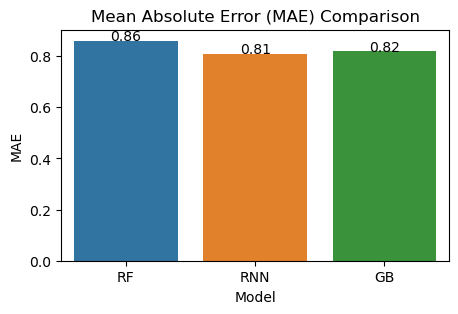

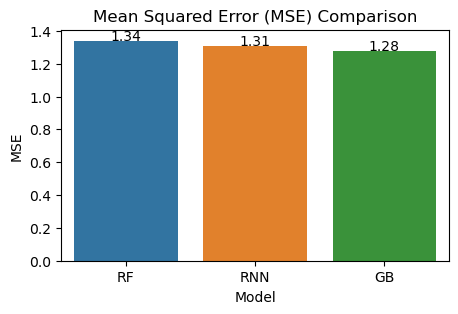

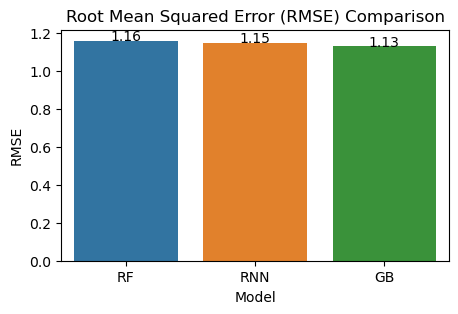

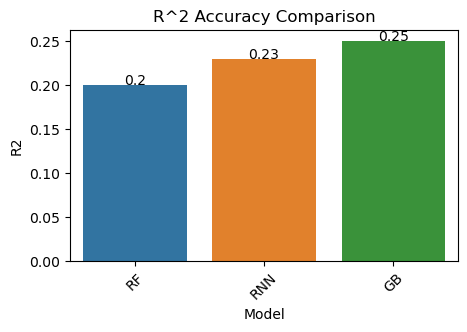

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store the evaluation metrics in dictionaries
rf_metrics = {
    'Model': 'RF',
    'MAE': 0.86,
    'MSE': 1.34,
    'RMSE': 1.16,
    'R2': 0.20
}


rnn_metrics = {
    'Model': 'RNN',
    'MAE': 0.81,
    'MSE': 1.31,
    'RMSE': 1.15,
    'R2': 0.23
}

gb_metrics = {
    'Model': 'GB',
    'MAE': 0.82,
    'MSE': 1.28,
    'RMSE': 1.13,
    'R2': 0.25
}

# Combine metrics into a single dataframe
metrics_df = pd.DataFrame([rf_metrics, rnn_metrics, gb_metrics])

# Visualize the comparison using bar plots
plt.figure(figsize=(5, 3))
sns.barplot(x='Model', y='MAE', data=metrics_df)
plt.title('Mean Absolute Error (MAE) Comparison')
# plt.xticks(rotation=45)
# Annotate data points
for index, row in metrics_df.iterrows():
    plt.text(index, row['MAE'], str(round(row['MAE'], 2)), color='black', ha="center")
plt.show()

plt.figure(figsize=(5, 3))
sns.barplot(x='Model', y='MSE', data=metrics_df)
plt.title('Mean Squared Error (MSE) Comparison')
# plt.xticks(rotation=45)
# Annotate data points
for index, row in metrics_df.iterrows():
    plt.text(index, row['MSE'], str(round(row['MSE'], 2)), color='black', ha="center")
plt.show()

plt.figure(figsize=(5, 3))
sns.barplot(x='Model', y='RMSE', data=metrics_df)
plt.title('Root Mean Squared Error (RMSE) Comparison')
# plt.xticks(rotation=45)
# Annotate data points
for index, row in metrics_df.iterrows():
    plt.text(index, row['RMSE'], str(round(row['RMSE'], 2)), color='black', ha="center")
plt.show()

plt.figure(figsize=(5, 3))
sns.barplot(x='Model', y='R2', data=metrics_df)
plt.title('R^2 Accuracy Comparison')
plt.xticks(rotation=45)
# Annotate data points
for index, row in metrics_df.iterrows():
    plt.text(index, row['R2'], str(round(row['R2'], 2)), color='black', ha="center")
plt.show()


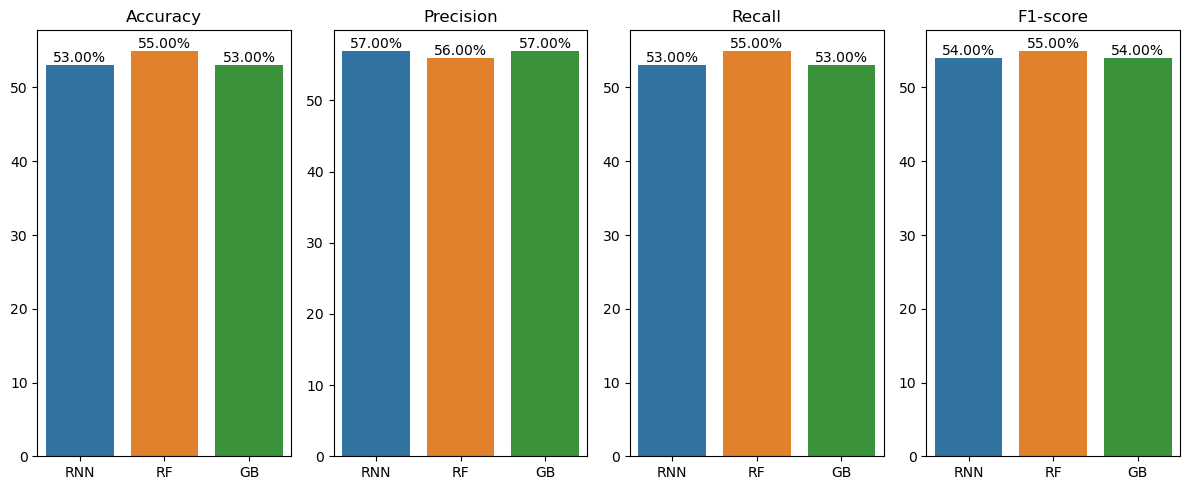

NameError: name 'conf_matrices' is not defined

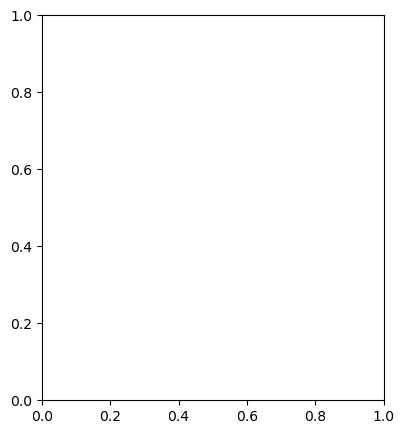

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define model names
models = ['RNN', 'RF', 'GB']

# Define evaluation metrics
accuracy = [0.53, 0.55, 0.53]
precision = [0.57, 0.56, 0.57]
recall = [0.53, 0.55, 0.53]
f1_score = [0.54, 0.55, 0.54]

# Convert metrics to percentage format
accuracy = [acc * 100 for acc in accuracy]
precision = [prec * 100 for prec in precision]
recall = [rec * 100 for rec in recall]
f1_score = [f1 * 100 for f1 in f1_score]

# Create bar plots for evaluation metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
sns.barplot(x=models, y=accuracy)
plt.title('Accuracy')
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom')

plt.subplot(1, 4, 2)
sns.barplot(x=models, y=precision)
plt.title('Precision')
for i, prec in enumerate(precision):
    plt.text(i, prec, f'{prec:.2f}%', ha='center', va='bottom')

plt.subplot(1, 4, 3)
sns.barplot(x=models, y=recall)
plt.title('Recall')
for i, rec in enumerate(recall):
    plt.text(i, rec, f'{rec:.2f}%', ha='center', va='bottom')

plt.subplot(1, 4, 4)
sns.barplot(x=models, y=f1_score)
plt.title('F1-score')
for i, f1 in enumerate(f1_score):
    plt.text(i, f1, f'{f1:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot confusion matrices
labels = ['Away Team Wins', 'Draw', 'Home Team Wins']
plt.figure(figsize=(15, 5))
for i, model in enumerate(models):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(conf_matrices[i], annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model}')
    plt.xticks(np.arange(3) + 0.5, labels)
    plt.yticks(np.arange(3) + 0.5, labels)
plt.tight_layout()
plt.show()


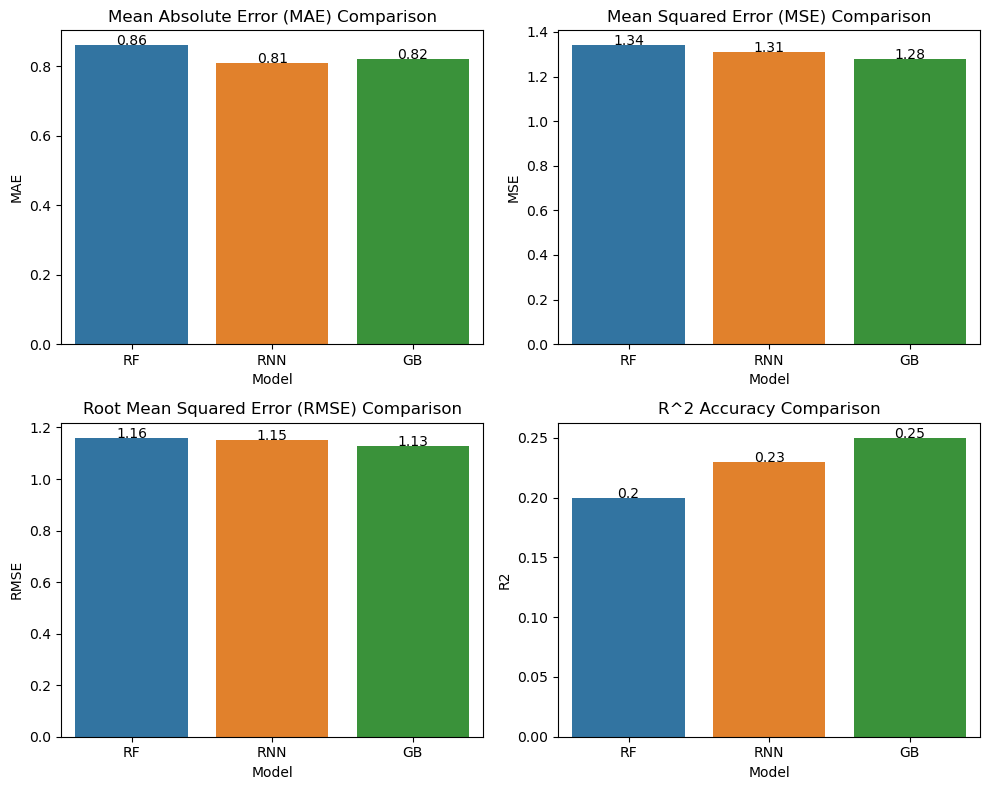

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store the evaluation metrics in dictionaries
rf_metrics = {
    'Model': 'RF',
    'MAE': 0.86,
    'MSE': 1.34,
    'RMSE': 1.16,
    'R2': 0.20
}


rnn_metrics = {
    'Model': 'RNN',
    'MAE': 0.81,
    'MSE': 1.31,
    'RMSE': 1.15,
    'R2': 0.23
}

gb_metrics = {
    'Model': 'GB',
    'MAE': 0.82,
    'MSE': 1.28,
    'RMSE': 1.13,
    'R2': 0.25
}

# Combine metrics into a single dataframe
metrics_df = pd.DataFrame([rf_metrics, rnn_metrics, gb_metrics])

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Visualize the comparison using bar plots
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axs[0, 0])
axs[0, 0].set_title('Mean Absolute Error (MAE) Comparison')
for index, row in metrics_df.iterrows():
    axs[0, 0].text(index, row['MAE'], str(round(row['MAE'], 2)), color='black', ha="center")

sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axs[0, 1])
axs[0, 1].set_title('Mean Squared Error (MSE) Comparison')
for index, row in metrics_df.iterrows():
    axs[0, 1].text(index, row['MSE'], str(round(row['MSE'], 2)), color='black', ha="center")

sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axs[1, 0])
axs[1, 0].set_title('Root Mean Squared Error (RMSE) Comparison')
for index, row in metrics_df.iterrows():
    axs[1, 0].text(index, row['RMSE'], str(round(row['RMSE'], 2)), color='black', ha="center")

sns.barplot(x='Model', y='R2', data=metrics_df, ax=axs[1, 1])
axs[1, 1].set_title('R^2 Accuracy Comparison')
for index, row in metrics_df.iterrows():
    axs[1, 1].text(index, row['R2'], str(round(row['R2'], 2)), color='black', ha="center")

plt.tight_layout()
plt.show()
